In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr, chi2_contingency

In [2]:
nba = pd.read_csv('nba_games.csv')

In [3]:
print(nba.head(10))

        game_id  year_id  fran_id      opp_fran game_location  is_playoffs  \
0  194611010TRH     1947   Knicks       Huskies             A            0   
1  194611020CHS     1947   Knicks         Stags             A            0   
2  194611020PRO     1947  Celtics  Steamrollers             A            0   
3  194611050BOS     1947  Celtics         Stags             H            0   
4  194611070STB     1947   Knicks       Bombers             A            0   
5  194611090DTF     1947  Celtics       Falcons             A            0   
6  194611110NYK     1947   Knicks         Stags             H            0   
7  194611130CHS     1947  Celtics         Stags             A            0   
8  194611140STB     1947  Celtics       Bombers             A            0   
9  194611160BOS     1947  Celtics       Huskies             H            0   

   pts  opp_pts game_result  forecast  point_diff  
0   68       66           W  0.359935           2  
1   47       63           L  0.368899

#### NBA Dataset subsetted into 2 smaller dataset games from 2010 named (nba_2010) and games from 2014 named (nba_2014)

In [4]:
nba_2010 = nba[nba.year_id == 2010]
nba_2014 = nba[nba.year_id == 2014]

In [5]:
print(nba_2010.head())

            game_id  year_id  fran_id      opp_fran game_location  \
21717  200910270CLE     2010  Celtics     Cavaliers             A   
21718  200910280BOS     2010  Celtics       Hornets             H   
21719  200910280MIA     2010   Knicks          Heat             A   
21720  200910280MIN     2010     Nets  Timberwolves             A   
21721  200910280OKC     2010  Thunder         Kings             H   

       is_playoffs  pts  opp_pts game_result  forecast  point_diff  
21717            0   95       89           W  0.277472           6  
21718            0   92       59           W  0.814619          33  
21719            0   93      115           L  0.258755         -22  
21720            0   93       95           L  0.475155          -2  
21721            0  102       89           W  0.716764          13  


In [6]:
print(nba_2014.head())

            game_id  year_id  fran_id   opp_fran game_location  is_playoffs  \
23468  201310300CLE     2014     Nets  Cavaliers             A            0   
23469  201310300NYK     2014   Knicks      Bucks             H            0   
23470  201310300SAS     2014    Spurs  Grizzlies             H            0   
23471  201310300TOR     2014  Celtics    Raptors             A            0   
23472  201310300UTA     2014  Thunder       Jazz             A            0   

       pts  opp_pts game_result  forecast  point_diff  
23468   94       98           L  0.611981          -4  
23469   90       83           W  0.793150           7  
23470  101       94           W  0.692980           7  
23471   87       93           L  0.361233          -6  
23472  101       98           W  0.526056           3  


#### Analyzing  the knicks to the nets with respect to points earned per game. in 2010

In [7]:
knicks_pts_10 = nba_2010.pts[nba.fran_id == 'Knicks']
nets_pts_10 = nba_2010.pts[nba.fran_id == 'Nets']

#### Calculating difference between 2 teams, Average points scored.

In [10]:
knicks_mean_score = np.mean(knicks_pts_10)
nets_mean_score = np.mean(nets_pts_10)
print(knicks_mean_score)
print(nets_mean_score)

102.10975609756098
92.3780487804878


In [9]:
diff_means = knicks_mean_score - nets_mean_score
print(diff_means)

9.731707317073173


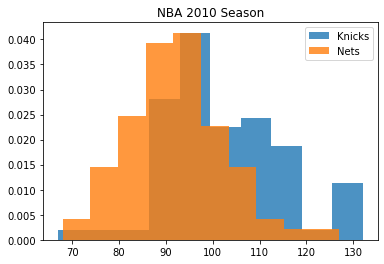

In [12]:
plt.hist(knicks_pts_10, alpha=0.8, density = True, label = 'Knicks')
plt.hist(nets_pts_10, alpha=0.8, density = True, label = 'Nets')
plt.legend()
plt.title('NBA 2010 Season')
plt.show()

#### Analyzing  the knicks to the nets with respect to points earned per game. in 2014

In [13]:
knicks_pts_14 = nba_2014.pts[nba.fran_id == 'Knicks']
nets_pts_14 = nba_2014.pts[nba.fran_id == 'Nets']

#### Calculating difference between 2 teams, Average points scored. in 2014 games

In [14]:
knicks_mean_score_14 = np.mean(knicks_pts_14)
nets_mean_score_14 = np.mean(nets_pts_14)
print(knicks_mean_score_14)
print(nets_mean_score_14)

98.58536585365853
98.13829787234043


In [15]:
diff_means_14 = knicks_mean_score_14 - nets_mean_score_14
print(diff_means_14)

0.44706798131809933


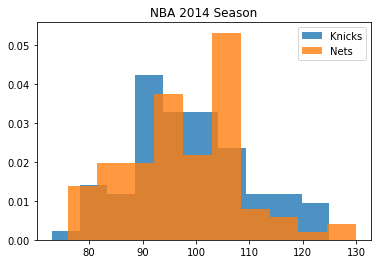

In [16]:
plt.hist(knicks_pts_14, alpha=0.8, density = True, label = 'Knicks')
plt.hist(nets_pts_14, alpha=0.8, density = True, label = 'Nets')
plt.legend()
plt.title('NBA 2014 Season')
plt.show()

### For the remainder of this project, i will use Data from 2010,

In [17]:
print(nba_2010)

            game_id  year_id  fran_id      opp_fran game_location  \
21717  200910270CLE     2010  Celtics     Cavaliers             A   
21718  200910280BOS     2010  Celtics       Hornets             H   
21719  200910280MIA     2010   Knicks          Heat             A   
21720  200910280MIN     2010     Nets  Timberwolves             A   
21721  200910280OKC     2010  Thunder         Kings             H   
...             ...      ...      ...           ...           ...   
22162  201006080BOS     2010  Celtics        Lakers             H   
22163  201006100BOS     2010  Celtics        Lakers             H   
22164  201006130BOS     2010  Celtics        Lakers             H   
22165  201006150LAL     2010  Celtics        Lakers             A   
22166  201006170LAL     2010  Celtics        Lakers             A   

       is_playoffs  pts  opp_pts game_result  forecast  point_diff  
21717            0   95       89           W  0.277472           6  
21718            0   92       59 

In [18]:
print(nba_2010.fran_id.unique())

['Celtics' 'Knicks' 'Nets' 'Thunder' 'Spurs']


#### All Team in Dataset, Investigating the Relationship between
#### Franchise and Points scored per Game using nba_2010.

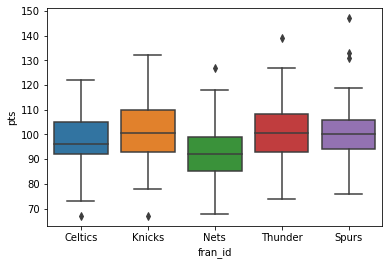

In [19]:
plt.clf()
sns.boxplot(data = nba_2010, x = 'fran_id', y = 'pts')
plt.show()

#### Want to Know if teams tend to win more games at Home compared to Away.

In [20]:
location_result_freq = pd.crosstab(nba_2010.game_location, nba_2010.game_result)

In [21]:
print(location_result_freq)

game_result      L    W
game_location          
A              133   92
H              105  120


In [22]:
location_result_proportions = location_result_freq / len(nba_2010)

In [23]:
print(location_result_proportions)

game_result           L         W
game_location                    
A              0.295556  0.204444
H              0.233333  0.266667


#### Calculating expected contingency using location result freq.

In [24]:
chi2, pval, dof, expected = chi2_contingency(location_result_freq)

In [25]:
print(chi2)
print(expected)

6.501704455367053
[[119. 106.]
 [119. 106.]]


#### Calculating the [covariance] between forcast and point diff.

In [27]:
point_diff_forcast_cov = np.cov(nba_2010.forecast, nba_2010.point_diff)

In [28]:
print(point_diff_forcast_cov)

[[5.22668307e-02 1.37461257e+00]
 [1.37461257e+00 1.86559287e+02]]


In [30]:
point_diff_forecast_corr = pearsonr(nba_2010.forecast, nba_2010.point_diff)

In [31]:
print(point_diff_forecast_corr)

(0.44020887084680815, 9.410391573138826e-23)


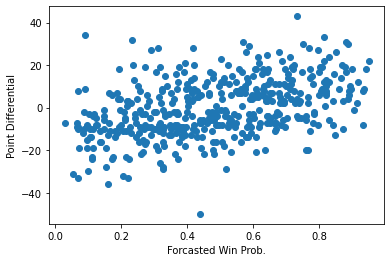

In [34]:
plt.clf()
plt.scatter('forecast', 'point_diff', data = nba_2010)
plt.xlabel('Forcasted Win Prob.')
plt.ylabel('Point Differential')
plt.show()